In [6]:
## Centerized Matplot Figure
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Libraies

In [9]:
import Heart_Disease_Function as hf
import pandas as pd
import matplotlib.pyplot as plt

## Load the Data 

In [4]:
df = pd.read_csv("data/heart disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

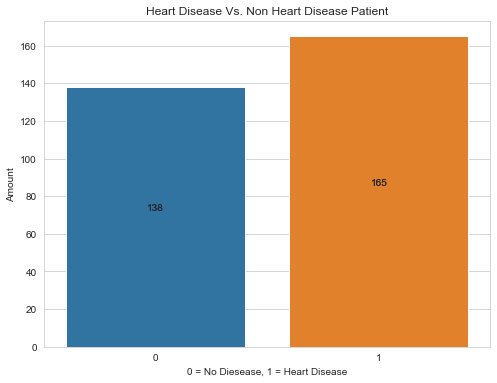

In [5]:
# How many target do we have
hf.plot_bar_graph(x=df["target"].value_counts().keys().tolist(), 
               y =  df["target"].value_counts().tolist(),
               xlabel = "0 = No Diesease, 1 = Heart Disease",
               ylabel = "Amount",
               title = "Heart Disease Vs. Non Heart Disease Patient");

So we have 165 examples where someone has heart diseases based on their health parameters and 138 examples where someone does not have heart disease. We think that this is a relatively balanced problem –– meaning we have quite a similar amount in both classes. That's a Balanced classification problem

There is no missing value in this heart diseases data set therefore, we do not have to do anything about the missing values. However, if we are still trying to find out more about how data frankly might do we use the following method to see some numberical values about all of our columns.

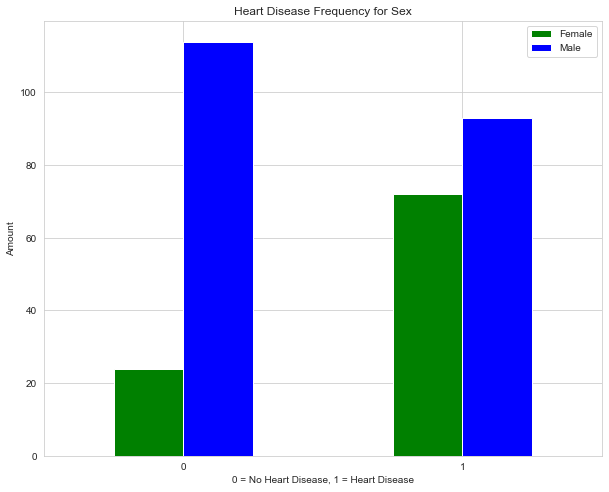

In [10]:
## Compare target column with sex column
hf.cross_tab_bar_graph(df.target, df.sex,
                    "Heart Disease Frequency for Sex",
                    "0 = No Heart Disease, 1 = Heart Disease", 
                    "Amount")
plt.legend(["Female", "Male"]);

** What can we infer from this?

> Since there are about 100 women and 72% of the entire woman have a positive value of heart disease being present, we can predict that if the participant is a woman, she has heart desease based on our data. There are about 200 male with around half indicating presence of heart disease. So if the participant is male, we might predict that around half the time he will be a heart disease patient based on this data. 

> Now if we average 72% and 50%, we get about 62.5%. It means that based on this data a random participant whether male or female will have 62.5% chance of having heart disease.  

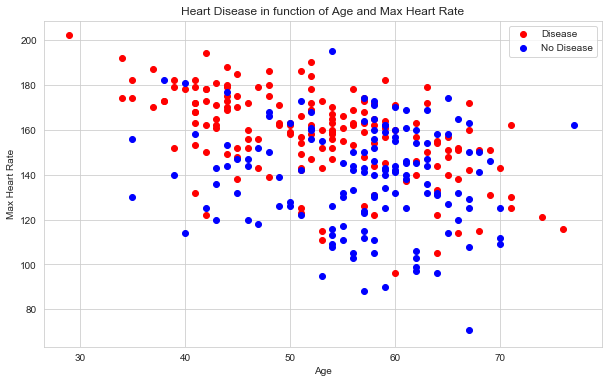

In [11]:
## Age vs. Max Heart Rate for Heart Disease
hf.plot_scatter(# Scatter with positive example
             df.age[df.target==1], 
             df.thalach[df.target==1],
             # Scatter with negative example
             df.age[df.target==0],
             df.thalach[df.target==0],
             "Heart Disease in function of Age and Max Heart Rate",
             "Age",
             "Max Heart Rate")

Based on the figure, we conclude that there is kind of a downward trend. The youngest someone is the higher the heart rate.

**Does chest pain lead someone having heart disease?**

cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease


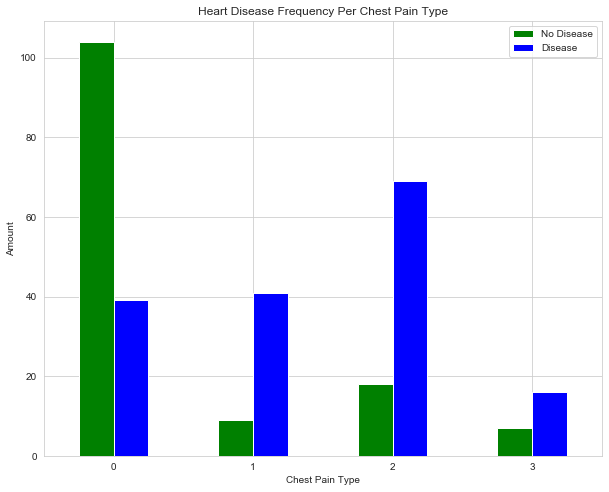

In [13]:
# Let's Illustrate in a crosstab
hf.cross_tab_bar_graph(df.cp, 
                    df.target, 
                    "Heart Disease Frequency Per Chest Pain Type",
                    "Chest Pain Type", 
                    "Amount")
plt.legend(["No Disease", "Disease"]);

Based on this bar graph we conclude that chest pain type has way more accounts with the heart disease.

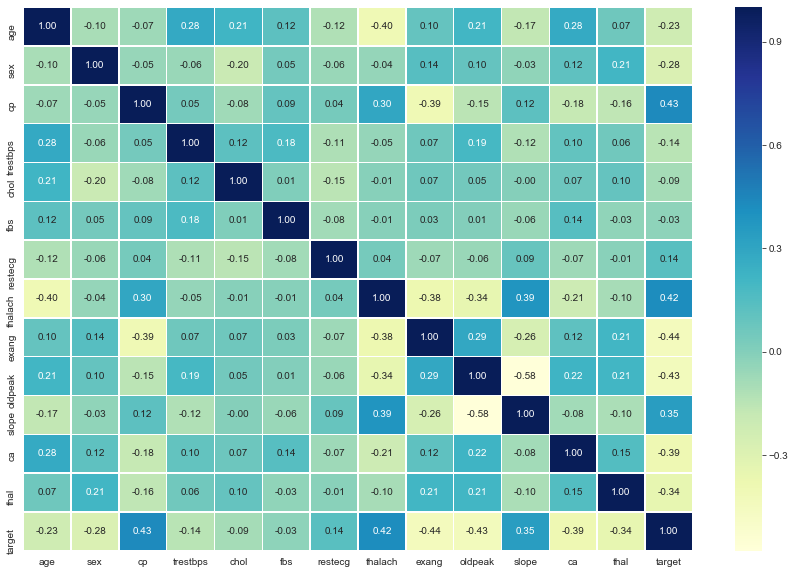

In [14]:
## Corrolation between Independent Variables and Dependent Variable (target column)
hf.corrolation_matrix(df.corr())